# Travel Insurance Prediction 

## Introduction

In this project, we aim to predict whether given customers will be interested in buying travel insurance, using the features provided. We assume that there are exceptions, as predictions made does not play a role of representative to all the customers. However, we can confidently make an argument based on the data, due to the tendencies or patterns we will be noticing throughout this project.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection

print("package loaded")

package loaded


## Import Dataset

In [2]:
data = pd.read_csv("data/TravelInsurancePrediction.csv").iloc[:,1:]
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
data.tail()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


## Data Exploration

### Feature names and types

* `Age`: Age of the customer
* `Employment Type`: The sectore in which the customer is employed
* `GraduateOrNot`: Whether the customer is gradted from college or not
* `AnnualIncome`: Annual income of the customer
* `FamilyMembers`: Number of family member living with the customer
* `ChronicDiseases`: Whether customer has chronic diseases
* `FrequentFlyer`: Whether customer books frequent flight tickets
* `EverTravelledAbroad`: Whether customer travelled to a different country before
* `TravelInsurance`: Whether customer has travel insurance

In [4]:
data.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

We see that some of the features have a type of `object`, thus, let us quantify these to numerical classes. First determine if any of the features have missing values, then proceed to replacing the values.

### Missing Values

In [5]:
data.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

We have no missing values. Now, let us replace the values for `Employment Type`, `GraduateOrNot`, `FrequentFlyer`, `EverytravelledAbroad`.

In [10]:
# quantifying Employment Type feature
employment_dict = {"Government Sector": 1, "Private Sector/Self Employed": 2}

for employment_type in list(employment_dict.keys()):
    data["Employment Type"].replace(employment_type, employment_dict[employment_type], inplace=True)

# quantifying GraduateOrNot feature
graduate_dict = {"Yes": 1, "No": 0}

for grad in list(graduate_dict.keys()):
    data["GraduateOrNot"].replace(grad, graduate_dict[grad], inplace=True)

# quantifying FrequentFlyer feature
flyer_dict = {"Yes": 1, "No": 0}

for flyer in list(flyer_dict.keys()):
    data["FrequentFlyer"].replace(flyer, flyer_dict[flyer], inplace=True)
    
# quantifying EverTravelledAborad feature
abroad_dict = {"Yes": 1, "No": 0}

for abroad in list(abroad_dict.keys()):
    data["EverTravelledAbroad"].replace(abroad, abroad_dict[abroad], inplace=True)
    
data.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,2,1,1250000,7,0,0,0,0
2,34,2,1,500000,4,1,0,0,1
3,28,2,1,700000,3,1,0,0,0
4,28,2,1,700000,8,1,1,0,0


### Data Dimensions, Description

In [11]:
data.shape

(1987, 9)

In [12]:
data.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,1.713135,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,1.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,2.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,2.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,2.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


### Outliers

We will examine if there are any outliers in each features.

<Axes: xlabel='EverTravelledAbroad'>

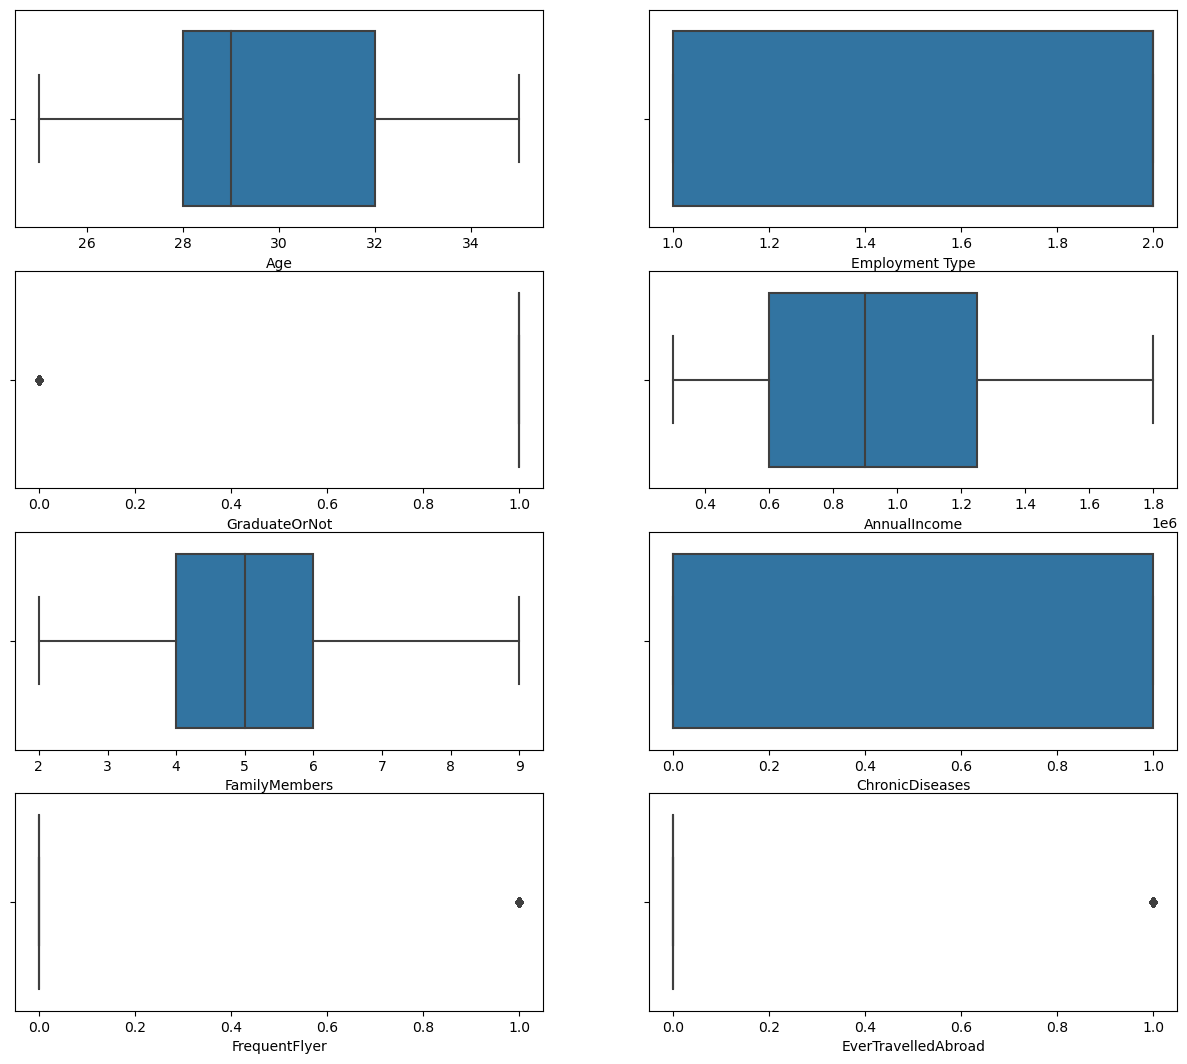

In [14]:
fig, ax = plt.subplots(4,2, figsize = (15,13))
sns.boxplot(x = data["Age"],ax = ax[0,0])
sns.boxplot(x = data["Employment Type"],ax = ax[0,1])
sns.boxplot(x = data["GraduateOrNot"],ax = ax[1,0])
sns.boxplot(x = data["AnnualIncome"],ax = ax[1,1])
sns.boxplot(x = data["FamilyMembers"],ax = ax[2,0])
sns.boxplot(x = data["ChronicDiseases"],ax = ax[2,1])
sns.boxplot(x = data["FrequentFlyer"],ax = ax[3,0])
sns.boxplot(x = data["EverTravelledAbroad"],ax = ax[3,1])


## Exploratory Data Analysis 

### Univariate Analysis

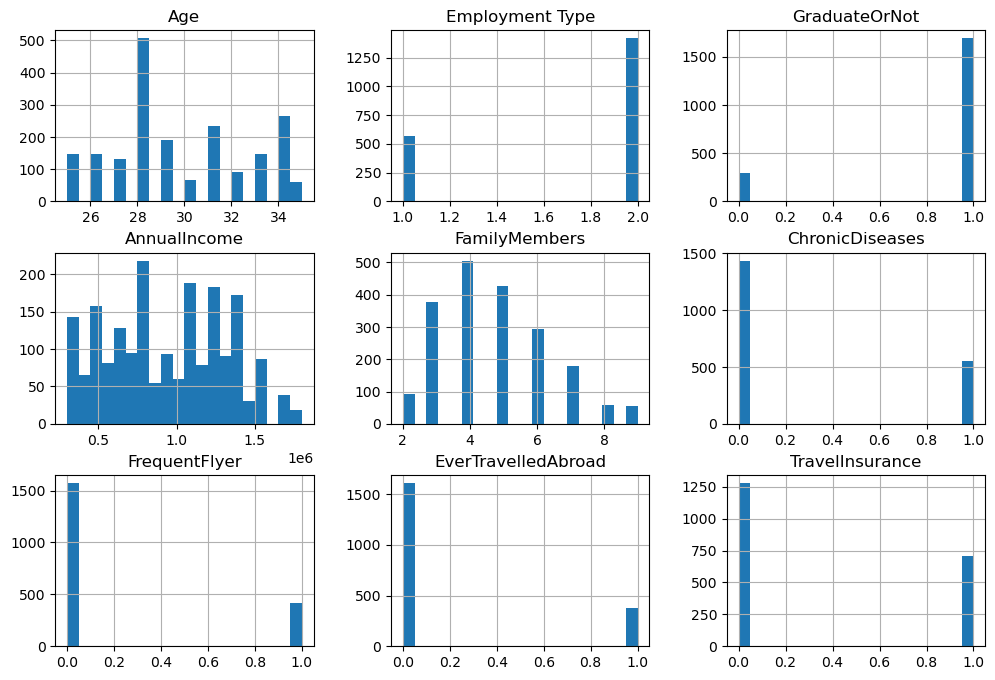

In [16]:
data.hist(figsize=(12,8),bins=20)
plt.show()